In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv("Population_Data.csv")
data.head(10)

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331
5,Region 20,6,"55,044","2,02,485","48,310","6,734","1,93,709","1,458",257529
6,Region 1,11,"44,727","2,67,200","36,430","8,297","2,60,089","4,295",311927
7,Region 24,10,"43,437","2,32,626","29,633","13,804","2,27,870","4,417",276063
8,Region 11,3,"35,923","2,17,717","27,005","8,918","2,12,406","3,503",253640
9,Region 4,8,"29,149","1,54,197","19,460","9,689","1,50,462","3,357",183346


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


<p>As we can see the data type of the features are in the object data type. To perform sklearn, we need to convert these object values into numeric data types</p>

In [4]:
numeric = ["Indians","Foreigners",
           "Indian_Male","Indian_Female",
           "Foreigners_Female",
           'Foreigners_Male',"Total Population"]

In [5]:
def cleaner(z):
  return z.replace(',','')
# remove the ',' from the numbers to help us converting

In [6]:
cleaner('100,234')
#testing the fucntion

'100234'

In [7]:
# applying it onto all the data
for i in data[numeric]:
  data[i] = data[i].apply(cleaner)

data.head()


,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


<p>After removing the commas(,) our next step will be data type conversion</p>

In [9]:
data[numeric] = data[numeric].apply(pd.to_numeric)
data.info()

# we are using pandas pd.to_numeric method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


<h4>Verifying integrity of the data</h4>

In [10]:
data[['Indians','Foreigners']].sum().sum() - data['Total Population'].sum()

0

In [11]:
data[['Indian_Male','Indian_Female',"Foreigners_Male",'Foreigners_Female']].sum().sum() - data['Total Population'].sum()

-112859

<p>Total numbers of Indians+Foreigners, is equal to the value of Total Population. Which suggests integrity of the data.
<br> But, We are getting negative integrity while doing the same Gender wise. That means our data is serving a valueable information that in the population data set there are also some people who do not identify themsekves as Male or Female. This particular data can be useful to us depending on the type of campaign the firm wants to run.</p> 

In [13]:
# Calculating total numbers of Male and Female in the population
MF_sum = data['Indian_Male'] + data['Indian_Female'] + data["Foreigners_Male"] + data['Foreigners_Female']
# Calculating number of 'Other's
data['Other'] = data['Total Population'] - MF_sum
data.head(10)

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191
5,Region 20,6,55044,202485,48310,6734,193709,1458,257529,7318
6,Region 1,11,44727,267200,36430,8297,260089,4295,311927,2816
7,Region 24,10,43437,232626,29633,13804,227870,4417,276063,339
8,Region 11,3,35923,217717,27005,8918,212406,3503,253640,1808
9,Region 4,8,29149,154197,19460,9689,150462,3357,183346,378


<h4>Feature Scaling</h4>

In [14]:
data['Region'].nunique(),data['Office Location Id'].nunique()

(38, 38)

In [15]:
data1 = data.drop(columns = ['Region',"Office Location Id", 'Total Population'])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Other
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


<h3>Normalizing the data</h3>

In [17]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data1.columns
data1 = norm.fit_transform(data1)

data1 = pd.DataFrame(data1, columns = columns)
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Other
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


<h3>Finding the proper K-Mean value</h3>

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data1)
pred=kmeans.predict(data1)

In [19]:
pred, len(pred)

(array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 38)

In [20]:
pd.Series(pred).value_counts()

0    30
1     8
dtype: int64

In [21]:
kmeans.inertia_

0.028113285898827122

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data1)
    SSE.append(kmeans.inertia_)

In [37]:
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

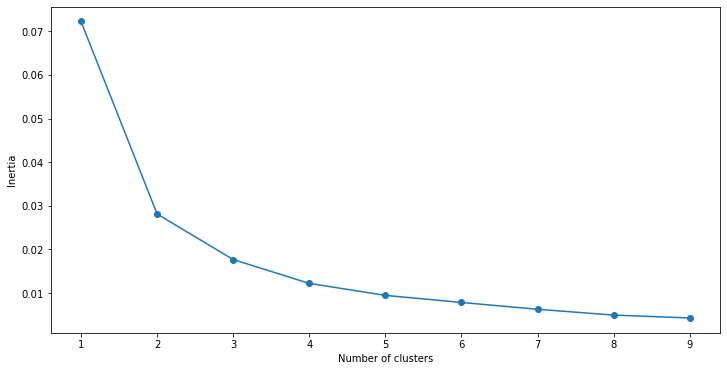

In [38]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1)
pred=kmeans.predict(data1)

In [40]:
data1['cluster'] = pred

In [41]:
def seg(str_x, str_y, clusters):
  x = []
  y = []

  for i in range(clusters):
    x.append(data1[str_x][data1['cluster']==i])
    y.append(data1[str_y][data1['cluster']==i])
  
  return x,y

def plot_clusters(str_x, str_y, clusters):
  plt.figure(figsize = (5,5), dpi = 120)
  
  x,y = seg(str_x, str_y, clusters)

  for i in range(clusters):
    plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
  
  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+" Vs "+str_y))
  plt.legend()

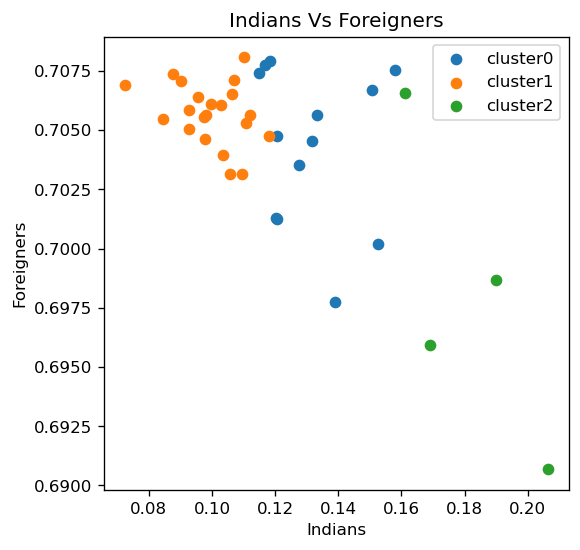

In [42]:
plot_clusters('Indians', 'Foreigners',3)

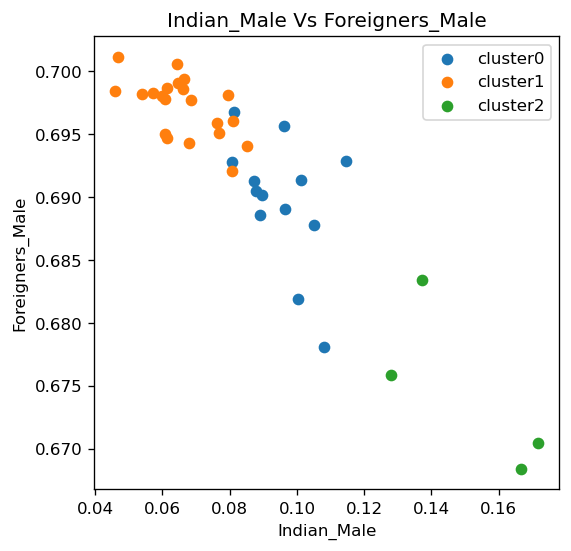

In [43]:
plot_clusters('Indian_Male', 'Foreigners_Male',3)

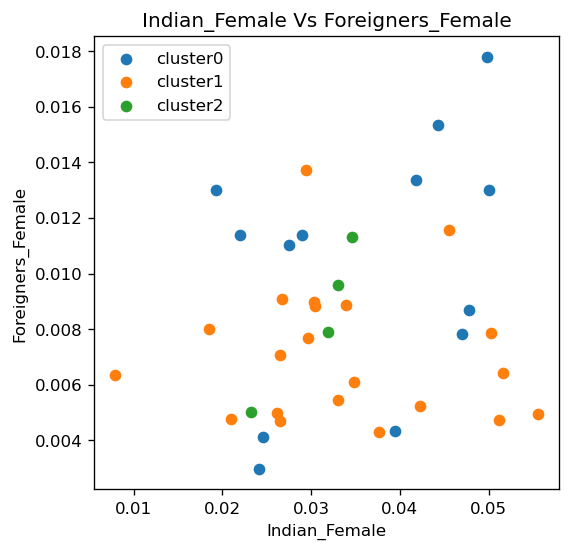

In [44]:
plot_clusters('Indian_Female', 'Foreigners_Female',3)

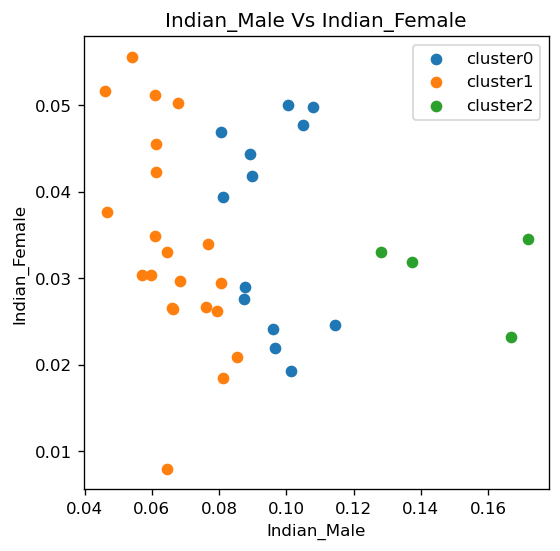

In [46]:
plot_clusters('Indian_Male','Indian_Female',3)

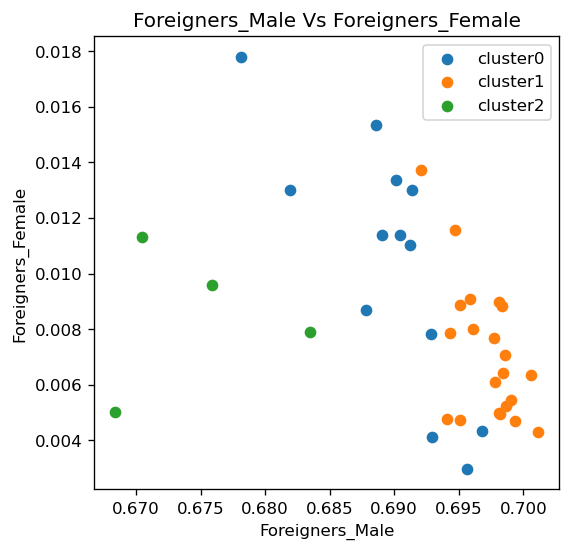

In [48]:
plot_clusters('Foreigners_Male','Foreigners_Female',3)

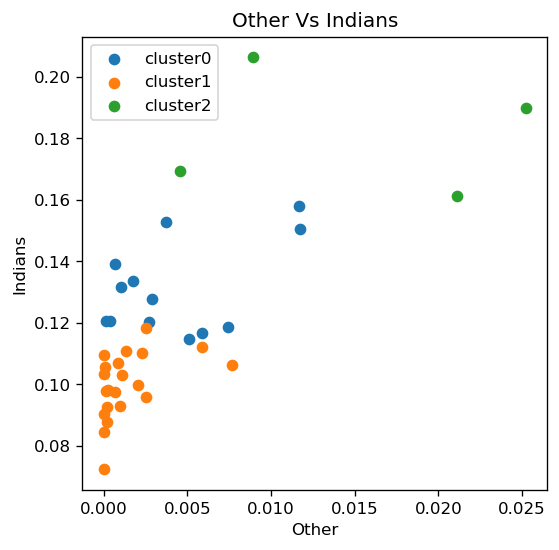

In [45]:
plot_clusters('Other', 'Indians',3)